# The Energy of a Quantum Physical Two-Body System

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


## Constants

In [2]:
# Length of interval
L = 20
# No. of subintervals
N = 500
# Stepsize
h = L / N

# Argument vector
xi = np.linspace(-L/2, L/2, N)

## Functions

In [3]:
def v_func1(x, k = 1):
    """Returns the potential function of the quantum system"""
    return k*x**2/2

In [4]:
def v_func2(x, k=1):
    return 1 - np.exp(-((1/2)*k*x**2))

In [5]:
def psi_func(x, *args):
    """Returns the wave function"""
    #return np.sqrt(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-x0)**2/(4*sigma**2))
    
    if len(args) == 2:
        x0, sigma = args
        return np.exp(-(x-x0)**2/(4*sigma**2))
    
    elif len(args) == 3:
        x0, a, b = args
        return np.exp(-a*(x-x0)**2-b*(x-x0)**4)
    

In [7]:
def create_psi_vector(*args):
    return np.array(psi_func(xi, *args)).reshape(-1,1)
    

In [9]:
def most_accurate_e():
    psi_vector = create_psi_vector(x0, sigma)

    H = -1/2*(finite_difference_matrix) + (np.diagflat(v_vector))
    E, u = np.linalg.eig(H)
    
    E_min = np.amin(E)
    
    index = np.where(E == E_min)[0][0]

    
    return E_min, u[:,index].reshape(-1, 1)

In [10]:
def finite_difference_scheme():
    """Returns a matrix representation of a second order central finite difference scheme"""
    m = np.zeros((N,N))
    for i in range(N):
        m[i,i] = -2
        if i+1 < N:
            m[i,i+1] = 1
        if i-1 >= 0:
            m[i, i-1] = 1
            
    return 1/(h**2)*m

In [11]:
def compute_e(*args):
    """Evaluate and returns the energy at the give point"""
    psi_vector = create_psi_vector(*args)
    
    #kinetic_constant = -reduced_planck**2/(2*e_mass) # Kan være 1 inntil videre
    h_psi = -1/2*(finite_difference_matrix @ psi_vector) + (v_vector * psi_vector)
     
    e = h*(psi_vector.T @ h_psi) / (h*(psi_vector.T @ psi_vector))
    
    return e[0][0]

In [13]:
def finite_difference(x, y, isX=False):
    """Calculates the central finite difference approximation of a partial derivate with two variables"""
    if isX:
        return (compute_e(x+h, y) - compute_e(x-h, y))/2*h
   
    return (compute_e(x , y+h) - compute_e(x, y-h))/2*h

In [63]:
def finite_difference_2(x0, a, b):
    
    return(compute_e(x0+h, a, b) - (compute_e(x0-h, a, b)))/2*h
    

In [64]:
def finite_difference_3(x0, a, b):
    
    return(compute_e(x0, a+h, b) - 
           (compute_e(x0, a-h, b)))/2*h

In [65]:
def finite_difference_4(x0, a, b):
    
    return(compute_e(x0, a, b+h) - 
           (compute_e(x0, a, b-h)))/2*h

In [66]:
def gradient_step(x0, sigma, lr):
    # print(finite_difference_e(sigma, x0))
    new_x0 = x0 - lr*finite_difference(x0, sigma, isX=True)
    new_sigma = sigma - lr*finite_difference(x0, sigma, isX=False)
    return (new_x0, new_sigma)

In [44]:
def gradient_step_3(*args):
    
    list_1, list_2, list_3 = []
    
    for i in len(args):
        for j, x in enumerate(args):  
            if j==i:
                list_1[j] = x + h 
                list_2[j] = x - h

            else:
                list_1[j], list_2[j] = x
        
        list_3[i] = args[i] - lr*(compute_e(list_1)-compute_e(list_2))/2*h
        
        i=i+1
    
    return list_3
    

In [45]:
def gradient_step_2(x0, a, b, lr):
    new_x0 = x0 - lr*finite_difference_2(x0, a, b)
    new_a = a - lr*finite_difference_3(x0, a, b)
    new_b = b - lr*finite_difference_4(x0, a, b)
    return (new_x0, new_a, new_b)

In [55]:
def gradient_descent(x0, sigma, lr=1, max_iterations=10000):
    number_of_iterations = 0 
    e = compute_e(x0, sigma) # Initial calculation of energy level
    gradient_path_list = []
    
    while (number_of_iterations < max_iterations): # Breaks loop if maximum iterations is reached
    
        new_x0, new_sigma = gradient_step(x0, sigma, lr) # New values for x0 and sigma
        new_e = compute_e(new_x0, new_sigma) # New value for energy level
            
        if lr < 0.0005: 
            break 
        if new_e > e:
            lr = lr/2 
        
        x0, sigma, e =  new_x0, new_sigma, new_e # updates the variables with the new values
        gradient_path_list.append([x0, sigma, e]) # saving values for plotting
        number_of_iterations += 1
        
    return x0, sigma, gradient_path_list, number_of_iterations

In [67]:
def gradient_descent_2(x0, a, b, lr=1, max_iterations=10000):
    number_of_iterations = 0 
    e = compute_e(x0, a, b)
    
    while (number_of_iterations < max_iterations): # Breaks loop if maximum iterations is reached
        
        
        
        new_x0, new_a, new_b = gradient_step_2(x0, a, b, lr) # New values for x0 and sigma

        new_e = compute_e(new_x0, new_a, new_b) # New value for energy level
        #print(new_x0, new_a, new_b , new_e)
            
        if lr < 0.0005: 
            break 
        if new_e > e:
            lr = lr*0.9 
        
        x0, a, b, e =  new_x0, new_a, new_b, new_e # updates the variables with the new values

        number_of_iterations += 1

        
    return x0, a, b, number_of_iterations

In [23]:
def create_plot_axes(x_min, x_max, x_step, y_min, y_max, y_step):
    
    """Creating surface for plotting"""

    X = np.arange(x_min, x_max, x_step)
    Y = np.arange(y_min, y_max, y_step)

    E = np.array([[compute_e(x, y) for y in Y] for x in X])

    X, Y = np.meshgrid(X, Y)
    
    return X, Y, E

In [24]:
def gradient_descent_plot(step_size, path):
    path = np.array(gradient_path_list) # transform the plot to a numpy array
    ax.plot(path[::step_size,0], path[::step_size,1], 
            path[::step_size, 2], 'bx-', label='path')

    ax.plot(path[-1:,0], path[-1:,1], 
            path[-1:, 2], markerfacecolor='r', marker='o', markersize=5, label='endpoint')

In [25]:
def plot_psi(ax, x0, sigma, *args, **kwargs):
    
    psi = psi_func(xi, x0, sigma)  
    psi_norm = psi/np.sqrt(norm_vector(psi))


    ax.plot(xi, psi_norm**2, *args, **kwargs)

In [70]:
def plot_psi_2(ax, x0, a, b, *args, **kwargs):
    
    psi = psi_func(xi, x0, a, b)  
    psi_norm = psi/np.sqrt(norm_vector(psi))


    ax.plot(xi, psi_norm**2, *args, **kwargs)

In [27]:
def norm_vector(vector):
    
    return h*(vector.T @ vector)

## Computing the Energy

In [56]:
x0 = -2
sigma = 3
max_iterations = 10000

# Initializing vectors
v_vector = np.array(v_func1(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()

# Finding lowest energy
e_guess = compute_e(x0, sigma)
E, u = most_accurate_e()

# Running gradient descent
new_x0, new_sigma, gradient_path_list, iterations = gradient_descent(x0, sigma, lr=1, max_iterations = max_iterations)

print(f"x0 at guess: {x0}, sigma at guess: {sigma}")
print(f"Energy at guess {e_guess}")

print(f"Used {iterations} out of {max_iterations} iterations\n")
print(f"Found x0: {new_x0}, found sigma: {new_sigma}")
print(f"Found energy: {compute_e(new_x0, new_sigma)}\n")
print(f"Most accurate answer for e: {E}")

x0 at guess: -2, sigma at guess: 3
Energy at guess 6.357659498620651
Used 9046 out of 10000 iterations

Found x0: -1.066297207864106e-06, found sigma: 0.7088730149236476
Found energy: 0.500954344761182

Most accurate answer for e: 0.5009517983743101


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Psi')


plt.plot(xi, (u/np.sqrt(h))**2, label = 'Fasit')
plot_psi(ax, x0, sigma, 'r--', label = 'Start')
plot_psi(ax, new_x0, new_sigma, 'y--', label = 'Slutt')

plt.legend();


In [72]:
x0 = -2
a = -1
b = 1
max_iterations = 10000

# Initializing vectors
v_vector = np.array(v_func2(xi)).reshape(-1, 1)
finite_difference_matrix = finite_difference_scheme()

# Finding lowest energy
e_guess = compute_e(x0, a, b)


# Running gradient descent
new_x0, new_a, new_b, iterations = gradient_descent_2(x0, a, b, lr=2, max_iterations = max_iterations)

print(f"x0 at guess: {x0}, a at guess: {a}, b at guess: {b}")
print(f"Energy at guess {e_guess}")

print(f"Used {iterations} out of {max_iterations} iterations\n")
print(f"Found x0: {new_x0}, found a: {new_a}, found b: {new_b}")
print(f"Found energy: {compute_e(new_x0, new_a, new_b)}\n")


x0 at guess: -2, a at guess: -1, b at guess: 1
Energy at guess 1.626347527778941
Used 10000 out of 10000 iterations

Found x0: -0.38647438323630484, found a: 0.20504953370233456, found b: 0.03831180721860125
Found energy: 0.4651311615399895



<IPython.core.display.Javascript object>


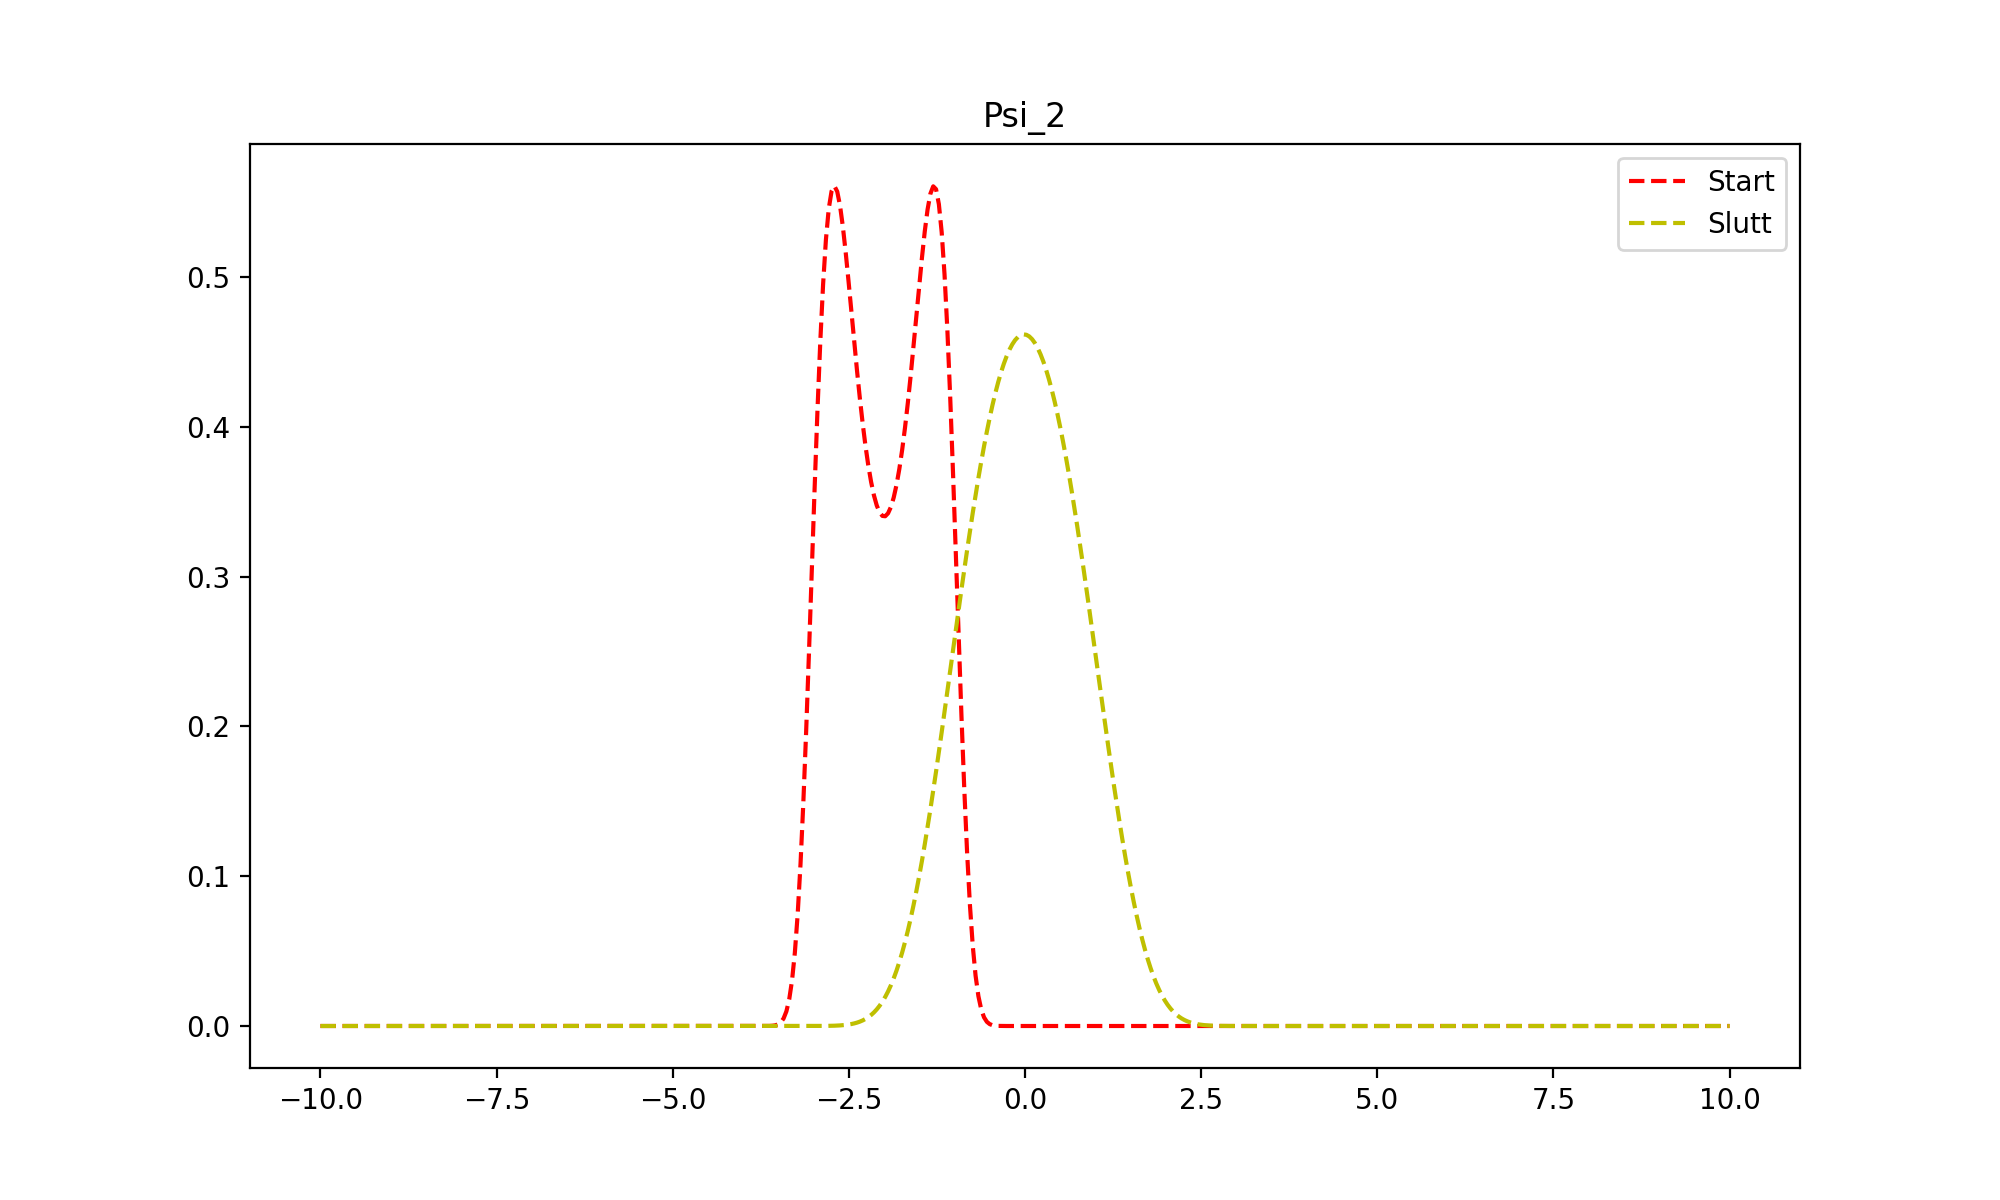

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Psi_2')


#plt.plot(xi, (u/np.sqrt(h))**2, label = 'Fasit')
plot_psi_2(ax, x0, a, b,'r--', label = 'Start')
plot_psi_2(ax, new_x0, new_a, new_b, 'y--', label = 'Slutt')

plt.legend();

### Plotting wavefunctions

### Plotting surface and paths

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
X, Y, E = create_plot_axes(-L/3, L/3, h*10, 0.5, 5, 0.1) 

ax.plot_surface(X, Y, Z=E.T, rstride=2, cstride=2, cmap='viridis', alpha = 0.6)

new_x0, new_sigma, gradient_path_list, _ = gradient_descent(x0=x0, sigma=sigma, max_iterations=max_iterations)
gradient_descent_plot(100, gradient_path_list)
new_x0, new_sigma, gradient_path_list, _ = gradient_descent(x0=4, sigma=3.5, max_iterations=10000) 
gradient_descent_plot(100, gradient_path_list)
new_x0, new_sigma, gradient_path_list, _ = gradient_descent(x0=-5, sigma=4, max_iterations=10000) 
gradient_descent_plot(100, gradient_path_list)

# Labels etc
ax.set_title('Energy(x, sigma)', fontsize=20)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('sigma', fontsize=15)
ax.set_zlabel('e', fontsize=15)
ax.view_init(elev=35, azim=300)
fig.legend(loc='upper left');